<h1>Analyst : Sophia Joyce Lozada</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Year'] = dengue['Year'].astype('object')



In [7]:
dengue['Month'].value_counts()

Month
January      85
February     85
March        85
April        85
May          85
June         85
July         85
August       85
September    85
October      85
November     85
December     85
Name: count, dtype: int64

In [8]:
dengue['Year'].value_counts()

Year
2016    204
2017    204
2018    204
2019    204
2020    204
Name: count, dtype: int64

In [9]:
dengue['Region'].value_counts()

Region
BARMM          60
CAR            60
NCR            60
Region I       60
Region II      60
Region III     60
Region IV-A    60
Region IV-B    60
Region IX      60
Region V       60
Region VI      60
Region VII     60
Region VIII    60
Region X       60
Region XI      60
Region XII     60
Region XIII    60
Name: count, dtype: int64

<h1>1.Regional Distribution of Dengue Deaths<h1/>
<h3>NCR has the highest dengue-related deaths (4008), likely due to its dense population and high transmission rates, followed by Region XII (2796) and Region VI (1825). The lowest death rates are in Region IV-B (130), Region I (157), and Region II (193), possibly due to better healthcare response or lower infection rates. </h3>

In [10]:
deaths_by_region =dengue.groupby('Region')['Dengue_Deaths'].sum()

In [11]:
deaths_by_region 

Region
BARMM           332
CAR            1008
NCR            4008
Region I        157
Region II       193
Region III      482
Region IV-A     652
Region IV-B     130
Region IX       532
Region V        185
Region VI      1825
Region VII     1760
Region VIII     585
Region X        848
Region XI       385
Region XII     2796
Region XIII     966
Name: Dengue_Deaths, dtype: int64

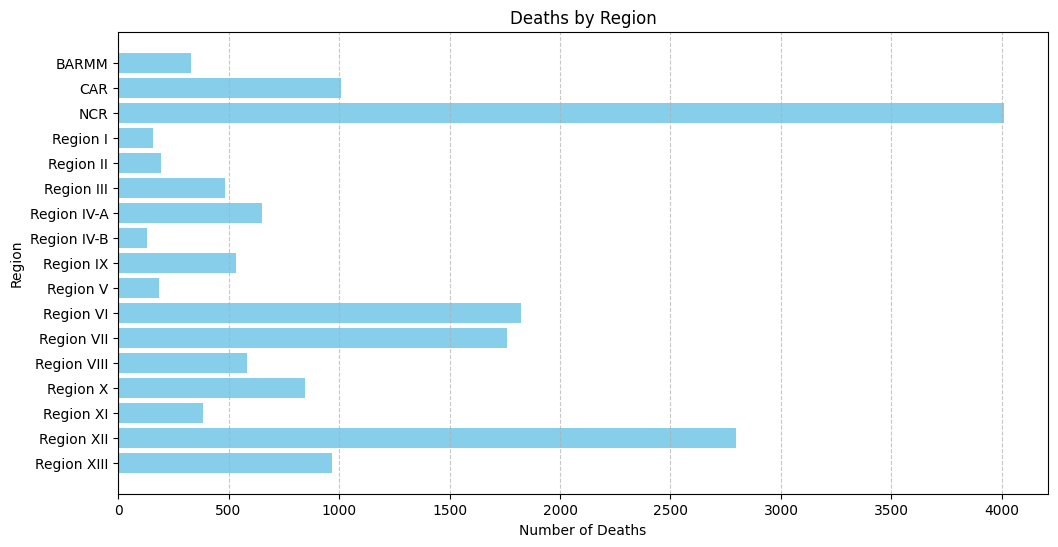

In [49]:
regions = [
    "BARMM", "CAR", "NCR", "Region I", "Region II", "Region III", "Region IV-A", "Region IV-B", 
    "Region IX", "Region V", "Region VI", "Region VII", "Region VIII", "Region X", 
    "Region XI", "Region XII", "Region XIII"
]
deaths = [332, 1008, 4008, 157, 193, 482, 652, 130, 532, 185, 1825, 1760, 585, 848, 385, 2796, 966]


plt.figure(figsize=(12,6))
plt.barh(regions, deaths, color='skyblue')
plt.xlabel("Number of Deaths")
plt.ylabel("Region")
plt.title("Deaths by Region")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h1>2.Case Fatality Rate by Region</h1>
<h3>Region XII has the highest case fatality rate (CFR) of 4.68%, indicating a severe impact of dengue, possibly due to healthcare limitations or delayed interventions. NCR (3.46%) and CAR (3.30%) also have high fatality rates despite having more developed healthcare infrastructure, suggesting high transmission and severe cases. In contrast, Region I (0.27%) and Region III (0.37%) have the lowest CFRs, which may reflect better disease management, early diagnosis, or stronger healthcare systems.</h3>

In [13]:

fatality_rate_region = (dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum())
fatality_rate_region['CFR'] = fatality_rate_region['Dengue_Deaths'] / fatality_rate_region['Dengue_Cases']



In [14]:
fatality_rate_region

,Dengue_Cases,Dengue_Deaths,CFR
Region,,,
BARMM,11537,332,0.028777
CAR,30582,1008,0.032961
NCR,115966,4008,0.034562
Region I,59066,157,0.002658
Region II,45141,193,0.004275
Region III,131064,482,0.003678
Region IV-A,163029,652,0.003999
Region IV-B,30849,130,0.004214
Region IX,47781,532,0.011134


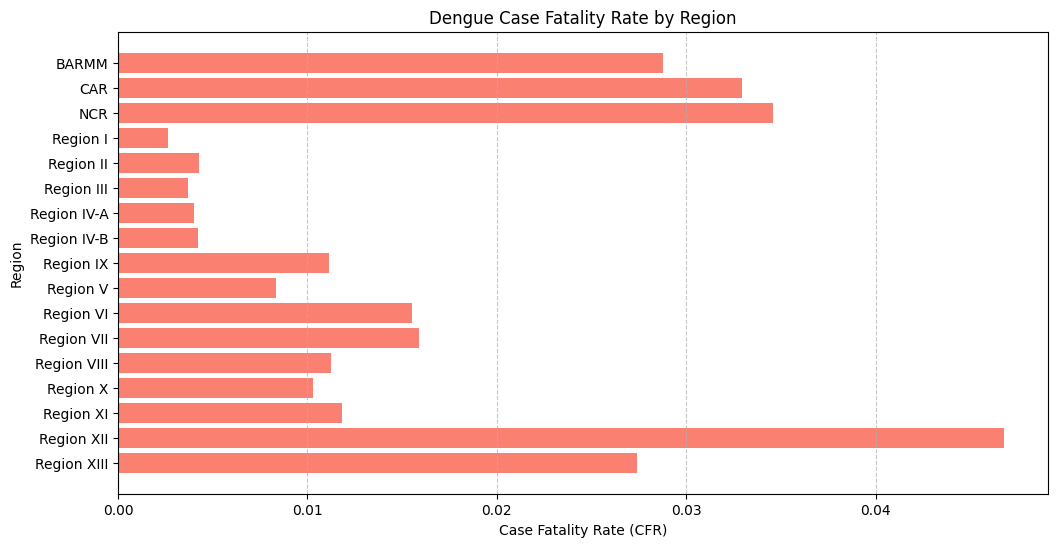

In [51]:
regions = [
    "BARMM", "CAR", "NCR", "Region I", "Region II", "Region III", "Region IV-A", "Region IV-B", 
    "Region IX", "Region V", "Region VI", "Region VII", "Region VIII", "Region X", 
    "Region XI", "Region XII", "Region XIII"
]
CFR = [0.028777, 0.032961, 0.034562, 0.002658, 0.004275, 0.003678, 0.003999, 0.004214, 
       0.011134, 0.008346, 0.015529, 0.015901, 0.011254, 0.010287, 0.011838, 0.046754, 0.027371]


plt.figure(figsize=(12,6))
plt.barh(regions, CFR, color='salmon')
plt.xlabel("Case Fatality Rate (CFR)")
plt.ylabel("Region")
plt.title("Dengue Case Fatality Rate by Region")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h1>3.Regional Distribution of Dengue Cases </h1>
<h3>Region IV-A (163,029) and Region III (131,064) have the highest dengue cases, likely due to high population density and mosquito-breeding conditions. In contrast, BARMM (11,537) and Region V (22,167) report the lowest cases, possibly due to lower population density or effective vector control measures.</h3>

In [54]:
cases_by_region = dengue.groupby('Region')['Dengue_Cases'].sum()

cases_by_region 

<h1>4.Top 5 Regions with Highest Cases</h1>
<h3>Region IV-A (163,029) has the highest dengue cases, followed by Region III (131,064) and Region VI (117,523), indicating that densely populated and urbanized areas are most affected.</h3>

In [16]:
top_5_cases = cases_by_region.nlargest(5)

In [17]:
top_5_cases

Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Name: Dengue_Cases, dtype: int64

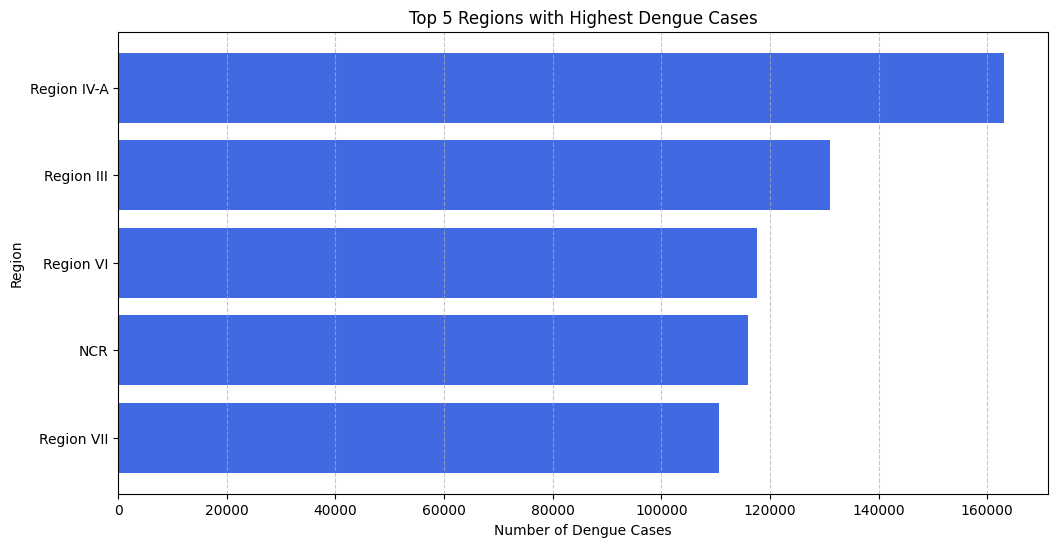

In [55]:
regions = [
    "Region IV-A", "Region III", "Region VI", "NCR", "Region VII"
]
cases = [163029, 131064, 117523, 115966, 110683]


plt.figure(figsize=(12,6))
plt.barh(regions, cases, color='royalblue')
plt.xlabel("Number of Dengue Cases")
plt.ylabel("Region")
plt.title("Top 5 Regions with Highest Dengue Cases")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h1>5.Top 5 Regions with Highest Deaths</h1>
<h3>NCR (4,008) has the highest number of dengue-related deaths, likely due to its large population and high transmission rates, while Region XII (2,796) follows with a concerningly high fatality rate. Regions VI (1,825), VII (1,760), and CAR (1,008) also report significant deaths, suggesting possible healthcare challenges or late detection in these areas.</h3>

In [18]:
top_5_deaths = deaths_by_region.nlargest(5)

In [19]:
top_5_deaths

Region
NCR           4008
Region XII    2796
Region VI     1825
Region VII    1760
CAR           1008
Name: Dengue_Deaths, dtype: int64

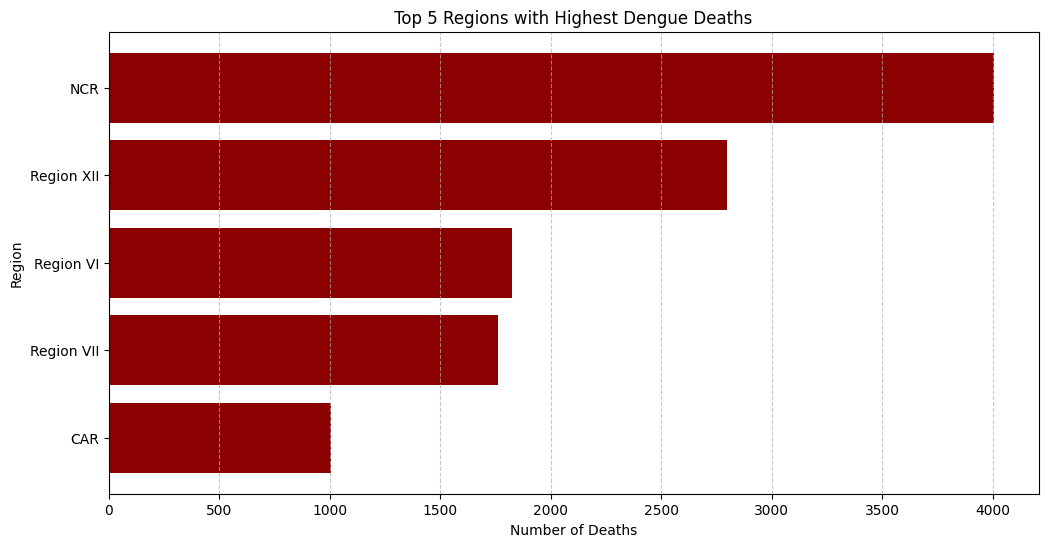

In [56]:
regions = [
    "NCR", "Region XII", "Region VI", "Region VII", "CAR"
]
deaths = [4008, 2796, 1825, 1760, 1008]


plt.figure(figsize=(12,6))
plt.barh(regions, deaths, color='darkred')
plt.xlabel("Number of Deaths")
plt.ylabel("Region")
plt.title("Top 5 Regions with Highest Dengue Deaths")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h1>6.Yearly Case Fatality Rate</h1>
<h3>The dengue fatality rate significantly declined from 3.88% in 2016 to 0.39% in 2019, despite a sharp increase in cases, indicating improved disease management and healthcare response. However, in 2020, the fatality rate rose to 1.31%, possibly due to healthcare system challenges during the COVID-19 pandemic, which may have affected dengue treatment and hospital capacities.</h3>

In [20]:
yearly_fatality_rate = (dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum())
yearly_fatality_rate['CFR'] = yearly_fatality_rate['Dengue_Deaths'] / yearly_fatality_rate['Dengue_Cases']

In [21]:
yearly_fatality_rate

,Dengue_Cases,Dengue_Deaths,CFR
Year,,,
2016,209544,8127,0.038784
2017,154155,4563,0.029600
2018,250783,1226,0.004889
2019,441902,1733,0.003922
2020,91041,1195,0.013126


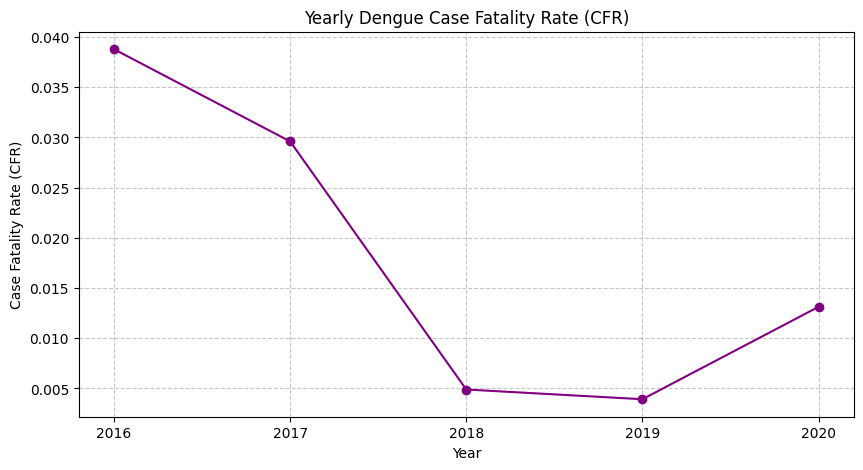

In [57]:
years = [2016, 2017, 2018, 2019, 2020]
CFR = [0.038784, 0.029600, 0.004889, 0.003922, 0.013126]


plt.figure(figsize=(10,5))
plt.plot(years, CFR, marker='o', linestyle='-', color='purple')
plt.xlabel("Year")
plt.ylabel("Case Fatality Rate (CFR)")
plt.title("Yearly Dengue Case Fatality Rate (CFR)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years)
plt.show()

<h1>7.Yearly Average Cases and Deaths</h1>
<h3>Dengue cases peaked in 2019 with an average of 2,166 cases per reporting period, but the fatality rate remained low, suggesting improved treatment and surveillance. In 2020, average cases dropped significantly to 446.</h3>

In [22]:
yearly_avg = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].mean()

In [23]:
yearly_avg

,Dengue_Cases,Dengue_Deaths
Year,,
2016,1027.176471,39.838235
2017,755.661765,22.367647
2018,1229.328431,6.009804
2019,2166.186275,8.495098
2020,446.279412,5.857843


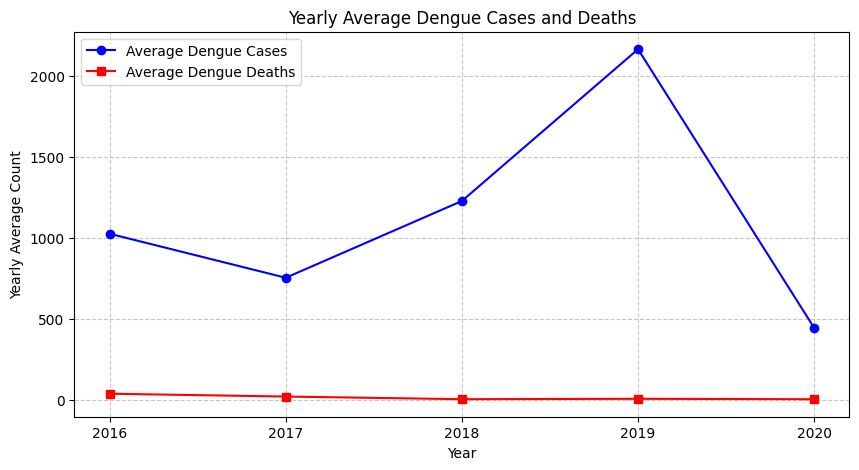

In [58]:
years = [2016, 2017, 2018, 2019, 2020]
avg_cases = [1027.176471, 755.661765, 1229.328431, 2166.186275, 446.279412]
avg_deaths = [39.838235, 22.367647, 6.009804, 8.495098, 5.857843]


plt.figure(figsize=(10,5))
plt.plot(years, avg_cases, marker='o', linestyle='-', color='blue', label='Average Dengue Cases')
plt.plot(years, avg_deaths, marker='s', linestyle='-', color='red', label='Average Dengue Deaths')
plt.xlabel("Year")
plt.ylabel("Yearly Average Count")
plt.title("Yearly Average Dengue Cases and Deaths")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years)
plt.show()

<h1>8.Correlation Between Cases and Deaths</h1>
<h3>The low correlation (0.038) between dengue cases and deaths suggests that a higher number of cases does not necessarily lead to a proportional increase in deaths. </h3>

In [24]:
case_deaths = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()

In [25]:
case_deaths

,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.038322
Dengue_Deaths,0.038322,1.000000


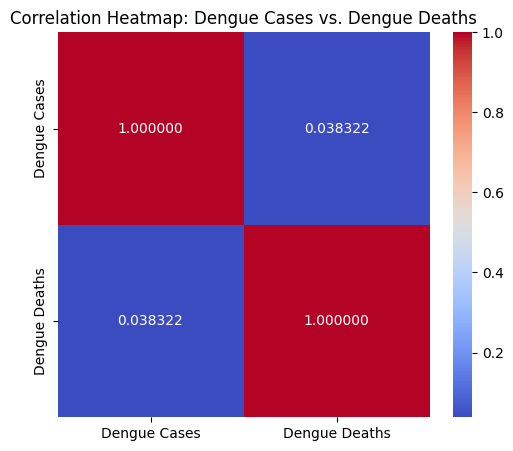

In [59]:
correlation_matrix = np.array([
    [1.000000, 0.038322],
    [0.038322, 1.000000]
])
labels = ["Dengue Cases", "Dengue Deaths"]


plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=labels, yticklabels=labels, fmt=".6f")
plt.title("Correlation Heatmap: Dengue Cases vs. Dengue Deaths")
plt.show()


<h1> 9. & 10. Seasonal Patterns in Dengue Cases and Deaths </h1>
<h3>Dengue cases peak in August (187,554) and September (177,943), aligning with the rainy season, which creates ideal mosquito breeding conditions. Similarly, deaths are highest in October (6,670) and September (6,148), suggesting that severe cases may take time to progress to fatalities. The lowest cases occur in April (32,508) and May (32,387), indicating reduced transmission during drier months. This pattern highlights the need for intensified mosquito control and public health interventions before and during the peak rainy months.</h3>

In [26]:
seasonal_cases = dengue.groupby('Month')['Dengue_Cases'].sum()
seasonal_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum()

In [27]:
seasonal_cases

Month
April         32508
August       187554
December      88431
February      77801
January       84328
July         138242
June          58110
March         57576
May           32387
November      94900
October      117645
September    177943
Name: Dengue_Cases, dtype: int64

In [28]:
seasonal_deaths

Month
April         200
August        714
December      404
February      315
January       394
July          611
June          322
March         291
May           162
November      613
October      6670
September    6148
Name: Dengue_Deaths, dtype: int64

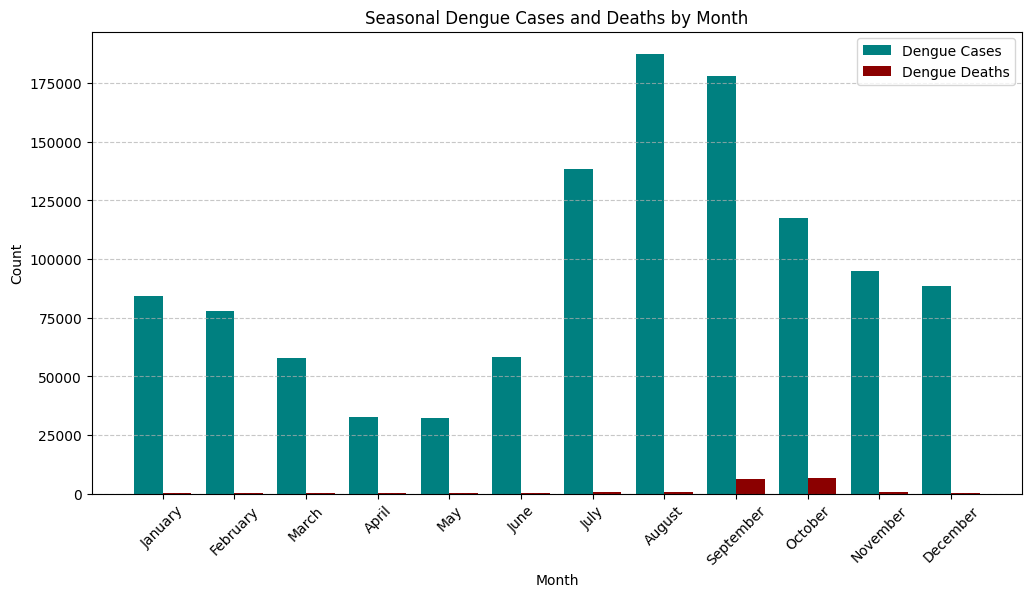

In [61]:
months = [
    "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"
]
cases = [84328, 77801, 57576, 32508, 32387, 58110, 138242, 187554, 177943, 117645, 94900, 88431]
deaths = [394, 315, 291, 200, 162, 322, 611, 714, 6148, 6670, 613, 404]

bar_width = 0.4
x = np.arange(len(months))

plt.figure(figsize=(12,6))
plt.bar(x - bar_width/2, cases, bar_width, label='Dengue Cases', color='teal')
plt.bar(x + bar_width/2, deaths, bar_width, label='Dengue Deaths', color='darkred')


plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Seasonal Dengue Cases and Deaths by Month")
plt.xticks(ticks=x, labels=months, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>11.Longitudinal Analysis by Region</h1>
<h3>Dengue cases showed a sharp increase in 2019 across all regions, with the highest spikes in Region IV-A (76,195), Region VI (60,357), and Region III (37,158), indicating a major outbreak. However, in 2020, cases dropped significantly across all regions, with NCR (7,183), Region VI (4,131), and Region III (15,991) experiencing major declines, likely due to COVID-19 restrictions limiting human movement and mosquito exposure. </h3>

In [29]:
longitudinal_cases = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()

In [30]:
longitudinal_cases

Year,2016,2017,2018,2019,2020
Region,,,,,
BARMM,2191,485,2460,5393,1008
CAR,9164,4045,7584,8808,981
NCR,13002,26103,29200,40478,7183
Region I,8281,8236,15511,19867,7171
Region II,3891,5310,17678,16634,1628
Region III,20989,25200,31726,37158,15991
Region IV-A,24282,22421,30410,76195,9721
Region IV-B,3999,2770,8019,10984,5077
Region IX,7215,4274,6161,27447,2684


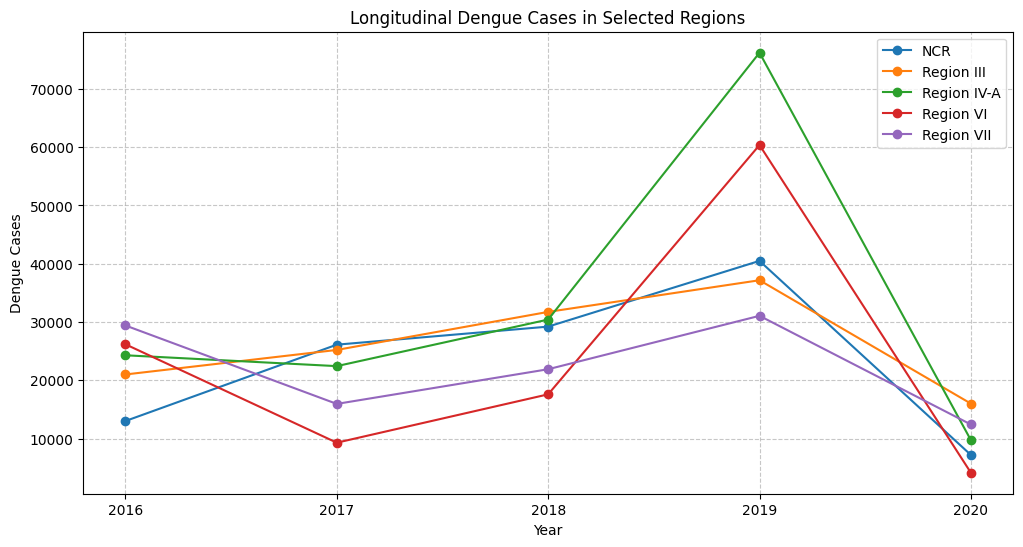

In [62]:
years = [2016, 2017, 2018, 2019, 2020]
selected_regions = {
    "NCR": [13002, 26103, 29200, 40478, 7183],
    "Region III": [20989, 25200, 31726, 37158, 15991],
    "Region IV-A": [24282, 22421, 30410, 76195, 9721],
    "Region VI": [26170, 9283, 17582, 60357, 4131],
    "Region VII": [29395, 15940, 21889, 31053, 12406]
}


plt.figure(figsize=(12,6))
for region, cases in selected_regions.items():
    plt.plot(years, cases, marker='o', linestyle='-', label=region)


plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.title("Longitudinal Dengue Cases in Selected Regions")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years)
plt.show()

<h1>12.Analysis of Yearly Variability</h1>
<h3>The highest variability in dengue cases occurred in 2019 (STD = 2880.38), indicating widespread and inconsistent outbreaks across regions, possibly due to environmental and epidemiological factors. In contrast, 2020 had the lowest case variability (STD = 627.29), suggesting a more uniform decline in cases, likely influenced by pandemic-related restrictions. Dengue deaths showed the highest variation in 2016 (STD = 192.47), possibly due to differences in healthcare response across regions, while 2018 had the lowest variability (STD = 6.82), suggesting more consistent fatality rates that year.</h3>

In [31]:
yearly_std = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].std()

In [32]:
yearly_std

,Dengue_Cases,Dengue_Deaths
Year,,
2016,1087.944973,192.469275
2017,894.176991,89.713046
2018,1221.698444,6.821431
2019,2880.384865,12.326230
2020,627.289105,21.104814


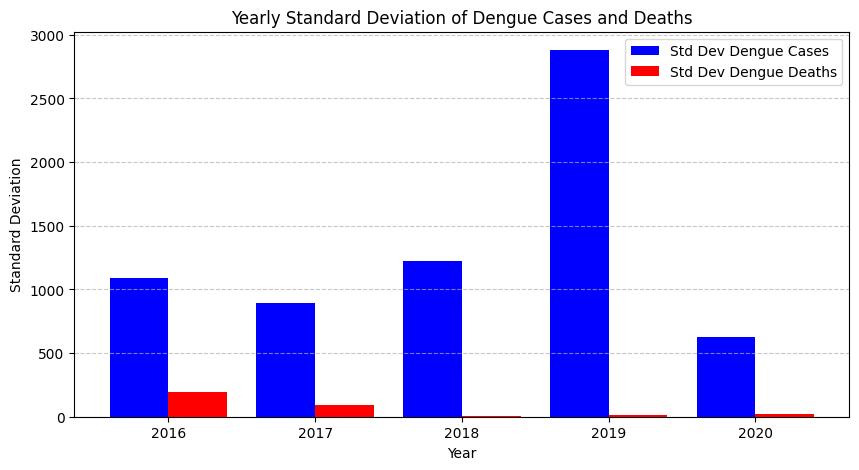

In [63]:
years = [2016, 2017, 2018, 2019, 2020]
std_cases = [1087.944973, 894.176991, 1221.698444, 2880.384865, 627.289105]
std_deaths = [192.469275, 89.713046, 6.821431, 12.326230, 21.104814]

bar_width = 0.4
x = np.arange(len(years))


plt.figure(figsize=(10,5))
plt.bar(x - bar_width/2, std_cases, bar_width, label='Std Dev Dengue Cases', color='blue')
plt.bar(x + bar_width/2, std_deaths, bar_width, label='Std Dev Dengue Deaths', color='red')


plt.xlabel("Year")
plt.ylabel("Standard Deviation")
plt.title("Yearly Standard Deviation of Dengue Cases and Deaths")
plt.xticks(ticks=x, labels=years)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>13.Percentage Contribution by Region</h1>
<h3>Region IV-A (14.21%) and Region III (11.42%) contributed the most to dengue cases, likely due to their large populations and favorable conditions for mosquito breeding. Meanwhile, BARMM (1.01%) and Region V (1.93%) had the lowest contributions, possibly due to lower population density or effective vector control measures.</h3>

In [33]:
total_cases = dengue['Dengue_Cases'].sum()
region_contribution = (cases_by_region / total_cases) * 100

In [64]:
region_contribution

Region
BARMM           1.005469
CAR             2.665272
NCR            10.106630
Region I        5.147700
Region II       3.934113
Region III     11.422446
Region IV-A    14.208249
Region IV-B     2.688542
Region IX       4.164194
Region V        1.931891
Region VI      10.242325
Region VII      9.646208
Region VIII     4.530405
Region X        7.184522
Region XI       2.834346
Region XII      5.211844
Region XIII     3.075844
Name: Dengue_Cases, dtype: float64

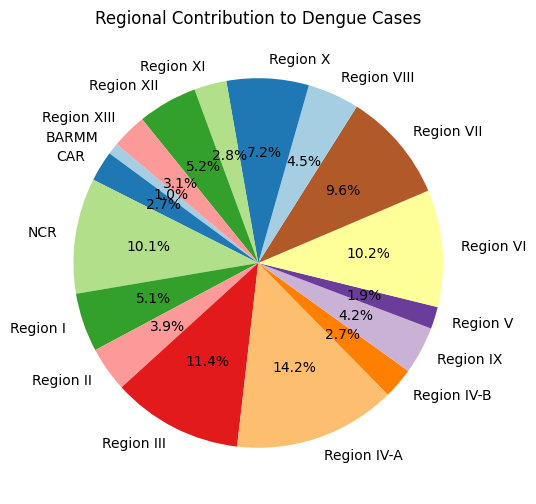

In [65]:
regions = [
    "BARMM", "CAR", "NCR", "Region I", "Region II", "Region III", "Region IV-A", "Region IV-B",
    "Region IX", "Region V", "Region VI", "Region VII", "Region VIII", "Region X", "Region XI", "Region XII", "Region XIII"
]
contributions = [
    1.005469, 2.665272, 10.106630, 5.147700, 3.934113, 11.422446, 14.208249, 2.688542,
    4.164194, 1.931891, 10.242325, 9.646208, 4.530405, 7.184522, 2.834346, 5.211844, 3.075844
]


plt.figure(figsize=(10,6))
plt.pie(contributions, labels=regions, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Regional Contribution to Dengue Cases")
plt.show()

<h1>14.Comparison of Cases and Deaths per Region</h1>
<h3>Region IV-A (163,029 cases) and Region III (131,064 cases) had the highest dengue cases, yet their fatality counts (652 and 482, respectively) were relatively low, suggesting better healthcare management or lower disease severity. In contrast, Region XII had significantly fewer cases (59,802) but a very high death count (2,796), indicating a much higher fatality rate, possibly due to healthcare limitations or late treatment. NCR (115,966 cases, 4,008 deaths) had both high cases and deaths, reflecting its dense population and increased transmission risk. Meanwhile, Region I (59,066 cases, 157 deaths) and Region II (45,141 cases, 193 deaths) had lower fatality counts relative to their cases, suggesting effective disease control or better access to treatment.</h3>

In [35]:
comparison_bar = cases_by_region.to_frame().merge(deaths_by_region.to_frame(), left_index=True, right_index=True)


In [36]:
comparison_bar 

,Dengue_Cases,Dengue_Deaths
Region,,
BARMM,11537,332
CAR,30582,1008
NCR,115966,4008
Region I,59066,157
Region II,45141,193
Region III,131064,482
Region IV-A,163029,652
Region IV-B,30849,130
Region IX,47781,532


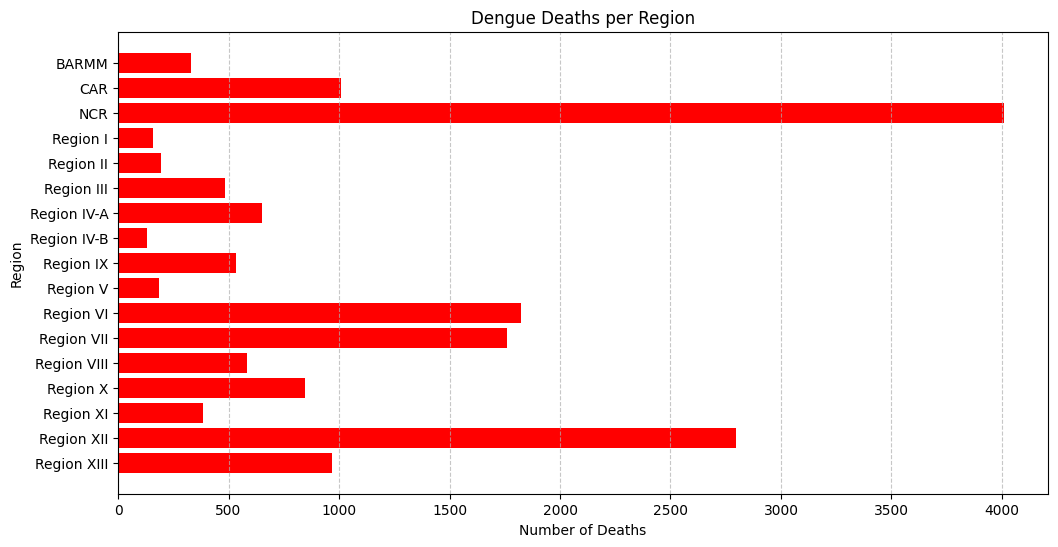

In [66]:
regions = [
    "BARMM", "CAR", "NCR", "Region I", "Region II", "Region III", "Region IV-A", "Region IV-B",
    "Region IX", "Region V", "Region VI", "Region VII", "Region VIII", "Region X", "Region XI", "Region XII", "Region XIII"
]
deaths = [
    332, 1008, 4008, 157, 193, 482, 652, 130,
    532, 185, 1825, 1760, 585, 848, 385, 2796, 966
]


plt.figure(figsize=(12,6))
plt.barh(regions, deaths, color='red')
plt.xlabel("Number of Deaths")
plt.ylabel("Region")
plt.title("Dengue Deaths per Region")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h1>15.Monthly Comparison of Deaths Across Years</h1>
<h3>Dengue deaths peaked in October and September of 2016 (3,954 and 3,418 deaths), marking the deadliest outbreak period, while subsequent years saw significantly lower fatalities. In 2019, deaths were more evenly distributed, with notable increases in August (280), July (232), and September (377), suggesting a prolonged transmission season. By 2020, deaths dropped sharply across all months, likely due to improved healthcare response and pandemic-related movement restrictions reducing mosquito exposure. Overall, October and September consistently recorded high deaths across years, reinforcing the need for intensified dengue prevention efforts before these peak months.</h3>

In [37]:
monthly_deaths_by_year = dengue.groupby(['Year', 'Month'])['Dengue_Deaths'].sum().unstack()

In [38]:
monthly_deaths_by_year 

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2016,40,132,83,43,73,123,69,47,41,104,3954,3418
2017,43,111,73,64,95,74,42,36,23,78,2098,1826
2018,41,156,135,43,65,153,78,58,31,131,150,185
2019,59,280,91,101,94,232,119,103,56,88,133,377
2020,17,35,22,64,67,29,14,47,11,212,335,342


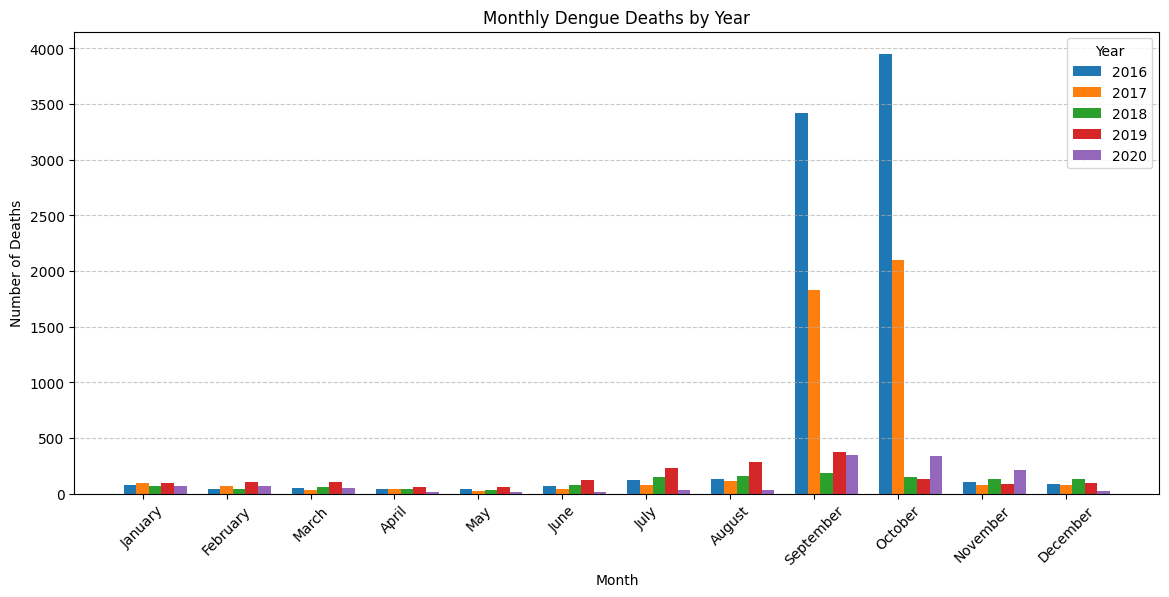

In [67]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
years = [2016, 2017, 2018, 2019, 2020]
deaths = [
    [73, 43, 47, 40, 41, 69, 123, 132, 3418, 3954, 104, 83],  # 2016
    [95, 64, 36, 43, 23, 42, 74, 111, 1826, 2098, 78, 73],  # 2017
    [65, 43, 58, 41, 31, 78, 153, 156, 185, 150, 131, 135],  # 2018
    [94, 101, 103, 59, 56, 119, 232, 280, 377, 133, 88, 91],  # 2019
    [67, 64, 47, 17, 11, 14, 29, 35, 342, 335, 212, 22]  # 2020
]


bar_width = 0.15
x = np.arange(len(months))


plt.figure(figsize=(14,6))
for i, year in enumerate(years):
    plt.bar(x + i * bar_width, deaths[i], bar_width, label=str(year))


plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.title("Monthly Dengue Deaths by Year")
plt.xticks(ticks=x + bar_width, labels=months, rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

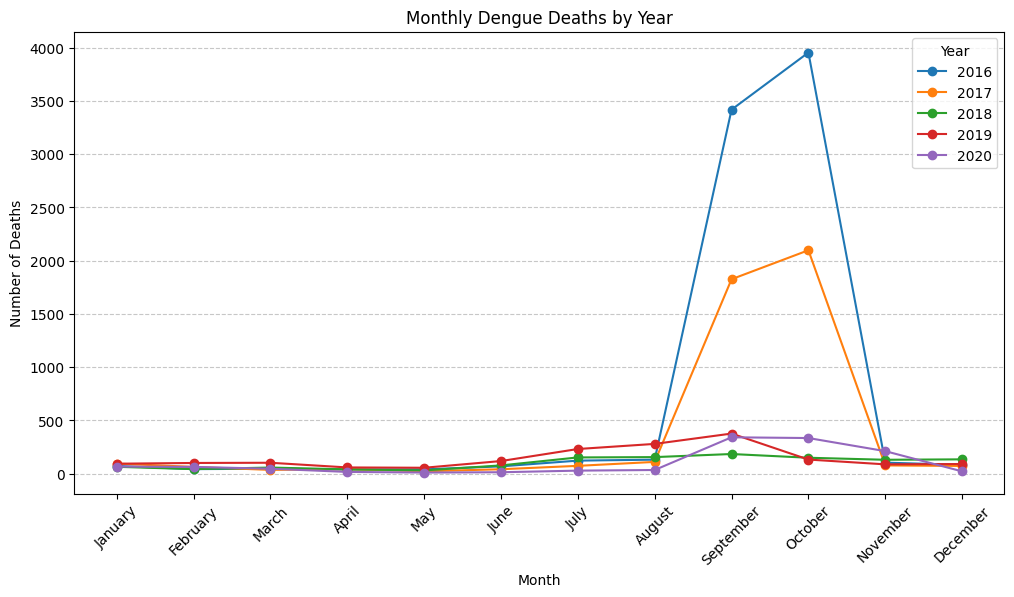

In [69]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
years = [2016, 2017, 2018, 2019, 2020]
deaths = [
    [73, 43, 47, 40, 41, 69, 123, 132, 3418, 3954, 104, 83],  # 2016
    [95, 64, 36, 43, 23, 42, 74, 111, 1826, 2098, 78, 73],  # 2017
    [65, 43, 58, 41, 31, 78, 153, 156, 185, 150, 131, 135],  # 2018
    [94, 101, 103, 59, 56, 119, 232, 280, 377, 133, 88, 91],  # 2019
    [67, 64, 47, 17, 11, 14, 29, 35, 342, 335, 212, 22]  # 2020
]

plt.figure(figsize=(12,6))
for i, year in enumerate(years):
    plt.plot(months, deaths[i], marker='o', linestyle='-', label=str(year))

plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.title("Monthly Dengue Deaths by Year")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>16.Monthly Comparison of Cases Across Years</h1>
<h3>Dengue cases peaked in August and September of 2019 (85,038 and 89,642 cases), marking the most severe outbreak year, while 2020 saw a drastic drop across all months, likely due to COVID-19 restrictions limiting mosquito exposure. Across multiple years, August and September consistently recorded the highest cases, aligning with the rainy season, which promotes mosquito breeding. In contrast, April and May consistently had the lowest cases, indicating reduced transmission during drier months. The sharp decline in 2020 cases, especially in peak months, highlights the impact of external factors like movement restrictions on dengue transmission.</h3>

In [39]:
monthly_cases_by_year = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack()

In [40]:
monthly_cases_by_year

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2016,7269,36195,13490,12386,17052,29744,10831,9300,8092,16252,21943,26990
2017,6343,25039,13235,9872,15623,18340,7589,7696,4853,12553,15259,17753
2018,6860,34210,31353,10466,12657,30363,11502,7944,6594,30191,30026,38617
2019,9252,85038,24397,25494,20672,55220,25523,19798,10387,30097,46382,89642
2020,2784,7072,5956,19583,18324,4575,2665,12838,2461,5807,4035,4941


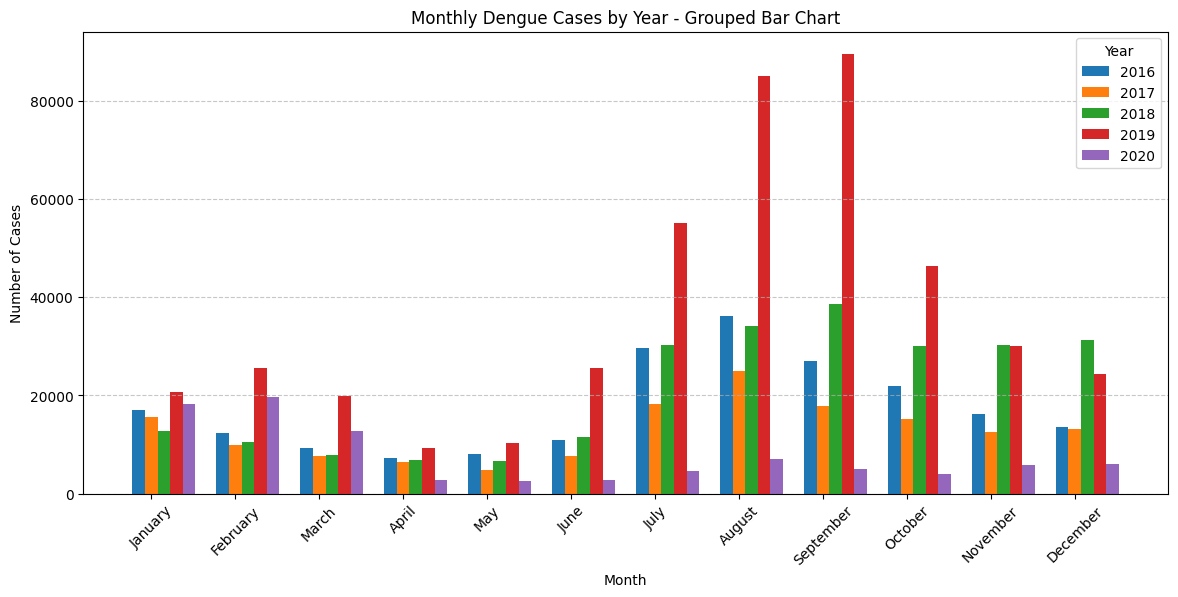

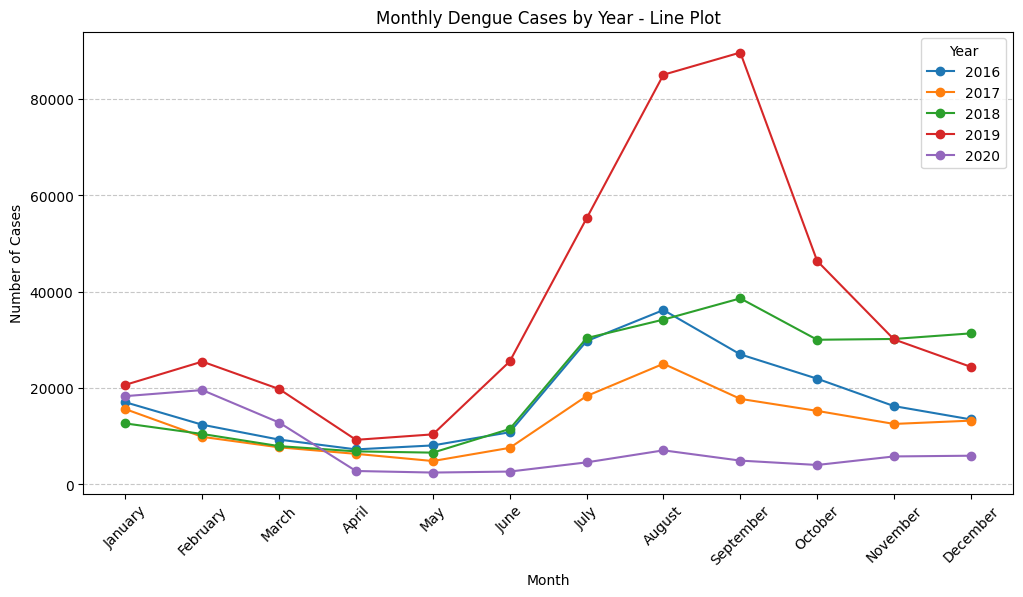

In [70]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
years = [2016, 2017, 2018, 2019, 2020]
cases = [
    [17052, 12386, 9300, 7269, 8092, 10831, 29744, 36195, 26990, 21943, 16252, 13490],  # 2016
    [15623, 9872, 7696, 6343, 4853, 7589, 18340, 25039, 17753, 15259, 12553, 13235],  # 2017
    [12657, 10466, 7944, 6860, 6594, 11502, 30363, 34210, 38617, 30026, 30191, 31353],  # 2018
    [20672, 25494, 19798, 9252, 10387, 25523, 55220, 85038, 89642, 46382, 30097, 24397],  # 2019
    [18324, 19583, 12838, 2784, 2461, 2665, 4575, 7072, 4941, 4035, 5807, 5956]  # 2020
]


bar_width = 0.15
x = np.arange(len(months))

plt.figure(figsize=(14,6))
for i, year in enumerate(years):
    plt.bar(x + i * bar_width, cases[i], bar_width, label=str(year))

plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.title("Monthly Dengue Cases by Year - Grouped Bar Chart")
plt.xticks(ticks=x + bar_width, labels=months, rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
for i, year in enumerate(years):
    plt.plot(months, cases[i], marker='o', linestyle='-', label=str(year))

plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.title("Monthly Dengue Cases by Year - Line Plot")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>17.Total Dengue Cases by Year</h1>
<h3>Dengue cases peaked in 2019 with 441,902 cases, marking the most severe outbreak, likely due to increased mosquito activity and favorable environmental conditions. In 2020, cases dropped sharply to 91,041, possibly due to COVID-19 restrictions reducing human movement and mosquito exposure.</h3>

In [41]:
cases_by_year = dengue.groupby('Year')['Dengue_Cases'].sum()

In [42]:
cases_by_year

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

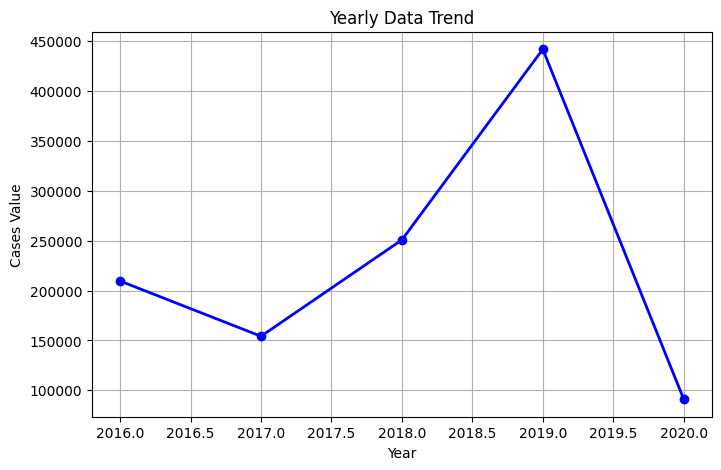

In [72]:
years = [2016, 2017, 2018, 2019, 2020]
values = [209544, 154155, 250783, 441902, 91041]

plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)

plt.xlabel("Year")
plt.ylabel("Cases Value")
plt.title("Yearly Data Trend")
plt.grid(True)


<h1>18.Total Dengue Deaths by Year</h1>
<h3>Dengue deaths declined significantly from 8,127 in 2016 to 1,195 in 2020, despite case fluctuations, suggesting improved healthcare and disease management. The sharp drop in 2018 and beyond indicates better early detection, treatment, and possible external factors like COVID-19 restrictions reducing severe infections.</h3>

In [43]:
deaths_by_year = dengue.groupby('Year')['Dengue_Deaths'].sum()

In [44]:
deaths_by_year 

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64

<h1>19.Monthly Trends in Dengue Cases</h1>
<h3>Dengue cases peak in August (2,206.52) and September (2,093.45), aligning with the rainy season when mosquito breeding is at its highest. In contrast, April (382.45) and May (381.02) report the lowest cases, likely due to drier conditions reducing mosquito activity.</h3>

In [45]:
monthly_cases = dengue.groupby('Month')['Dengue_Cases'].mean()

In [46]:
monthly_cases

Month
April         382.447059
August       2206.517647
December     1040.364706
February      915.305882
January       992.094118
July         1626.376471
June          683.647059
March         677.364706
May           381.023529
November     1116.470588
October      1384.058824
September    2093.447059
Name: Dengue_Cases, dtype: float64

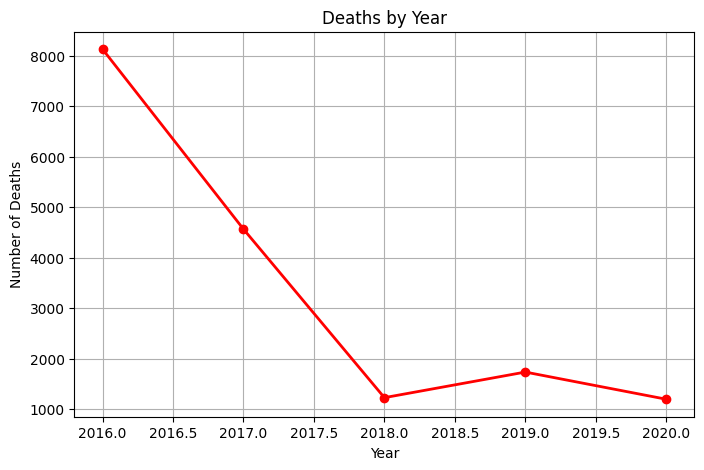

In [73]:
years = [2016, 2017, 2018, 2019, 2020]
deaths = [8127, 4563, 1226, 1733, 1195]


plt.figure(figsize=(8, 5))
plt.plot(years, deaths, marker='o', linestyle='-', color='r', linewidth=2, markersize=6)


plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Deaths by Year")
plt.grid(True)


plt.show()

<h1>20.Monthly Trends in Dengue Deaths</h1>
<h3>Dengue deaths peak in October (78.47) and September (72.33), indicating a lag between peak cases in August and September and severe outcomes. In contrast, May (1.91) and April (2.35) report the lowest death rates, aligning with the lowest case numbers and reduced transmission during drier months.</h3>

In [47]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean()

In [48]:
monthly_deaths

Month
April         2.352941
August        8.400000
December      4.752941
February      3.705882
January       4.635294
July          7.188235
June          3.788235
March         3.423529
May           1.905882
November      7.211765
October      78.470588
September    72.329412
Name: Dengue_Deaths, dtype: float64

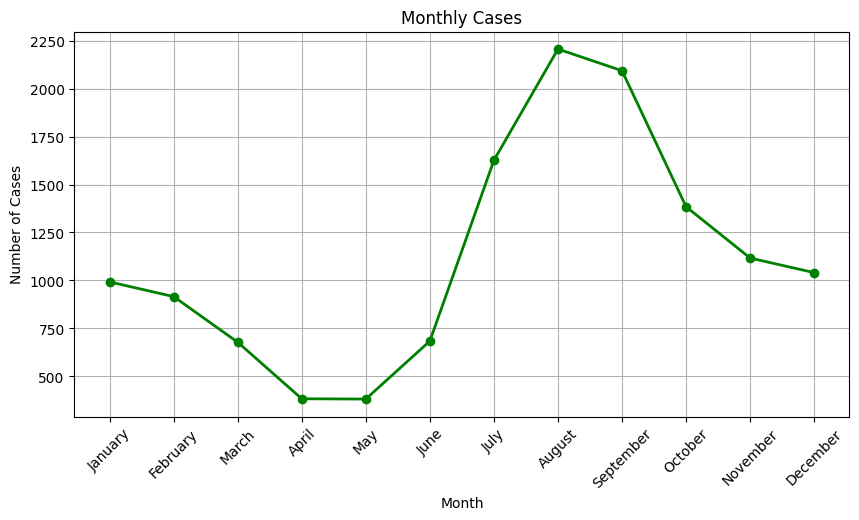

In [74]:
months = [
    "January", "February", "March", "April", "May", "June", "July",
    "August", "September", "October", "November", "December"
]
cases = [
    992.094118, 915.305882, 677.364706, 382.447059, 381.023529, 683.647059,
    1626.376471, 2206.517647, 2093.447059, 1384.058824, 1116.470588, 1040.364706
]


plt.figure(figsize=(10, 5))
plt.plot(months, cases, marker='o', linestyle='-', color='g', linewidth=2, markersize=6)


plt.xticks(rotation=45)


plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.title("Monthly Cases")
plt.grid(True)
